[View in Colaboratory](https://colab.research.google.com/github/tonyhuang84/notebook_dnn/blob/master/todo/fx/fx_data_analysis.ipynb)

## Dataset

In [1]:
!ls -la data/

total 118212
drwxr-xr-x 2 root root       73 Sep 18 16:22 .
drwxr-xr-x 4 root root       90 Sep 19 23:06 ..
-rw-r--r-- 1 root root 81040951 Sep 18 16:22 EURUSD_M1_2017.csv
-rw-r--r-- 1 root root 40004205 Sep 18 16:22 EURUSD_M1_2018_06.csv


In [10]:
import pandas as pd
print(pd.__version__)

%matplotlib inline   #[注意] 在 DNN farm 必須加這行 matplotlib 才畫得出圖表

0.23.4


In [3]:
# 載入 csv file
eurusd_m1_2017_df = pd.read_csv("data/EURUSD_M1_2017.csv", sep=";", skiprows=1, index_col="time")

In [4]:
# 印出前 5 筆看看
eurusd_m1_2017_df.head()

,T,high,open,close,low,vol,Ask,Bid,caS3,caS2,...,Momentum,ATR,ADX(main),ADX(+DI),ADX(-DI),WPR,Alligator(jaw),Alligator(teeth),Alligator(lips),Unnamed: 54
time,,,,,,,,,,,,,,,,,,,,,
2017.01.02 00:00,N,1.05132,1.05127,1.05129,1.05125,41.0,1.05128,1.05100,1.04924,1.05546,...,0.0,0.0,36.74128,9.84067,38.49271,-100.00000,1.05182,1.05167,1.05155,NaN
2017.01.02 00:01,N,1.05100,1.05100,1.05100,1.05100,1.0,1.05144,1.05116,1.04924,1.05546,...,0.0,0.0,34.61873,21.86191,33.36035,-82.02247,1.05179,1.05164,1.05149,NaN
2017.01.02 00:02,N,1.05116,1.05116,1.05116,1.05116,1.0,1.05144,1.05116,1.04924,1.05546,...,0.0,0.0,32.77918,18.94699,28.91230,-82.02247,1.05177,1.05161,1.05145,NaN
2017.01.02 00:03,N,1.05141,1.05116,1.05141,1.05116,3.0,1.05169,1.05141,1.04924,1.05546,...,0.0,0.0,27.37239,27.97628,25.05733,-53.93258,1.05175,1.05157,1.05136,NaN
2017.01.02 00:04,N,1.05141,1.05141,1.05141,1.05141,1.0,1.05169,1.05141,1.04924,1.05546,...,0.0,0.0,24.45660,24.24611,21.71635,-44.59459,1.05172,1.05153,1.05132,NaN


In [5]:
# show 出每行 header(index) name
eurusd_m1_2017_df.columns

Index(['T', 'high', 'open', 'close', 'low', 'vol', 'Ask', 'Bid', 'caS3',
       'caS2', 'pp', 'caR2', 'caR3', 'fiS3', 'fiS2', 'pp.1', 'fiR2', 'fiR3',
       'Stoch(K)', 'Stoch(D)', 'Stoch(K_H1)', 'Stoch(D_H1)', 'Stoch(K_H4)',
       'Stoch(D_H4)', 'RSI', 'RSI_H1', 'RSI_H4', 'RSI_D1', 'CCI', 'Candle(up)',
       'Candle(body)', 'Candle(down)', 'EMA5', 'EMA10', 'EMA20', 'EMA50',
       'EMA5_D1', 'EMA10_D1', 'EMA20_D1', 'EMA5_H4', 'EMA10_H4', 'EMA20_H4',
       'MACD(val)', 'MACD(sig)', 'Momentum', 'ATR', 'ADX(main)', 'ADX(+DI)',
       'ADX(-DI)', 'WPR', 'Alligator(jaw)', 'Alligator(teeth)',
       'Alligator(lips)', 'Unnamed: 54'],
      dtype='object')

In [7]:
# show 出 dataframe 資訊
eurusd_m1_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185811 entries, 2017.01.02 00:00 to 2017.12.29 11:59
Data columns (total 54 columns):
T                   185811 non-null object
high                185811 non-null float64
open                185811 non-null float64
close               185811 non-null float64
low                 185811 non-null float64
vol                 185811 non-null float64
Ask                 185811 non-null float64
Bid                 185811 non-null float64
caS3                185811 non-null float64
caS2                185811 non-null float64
pp                  185811 non-null float64
caR2                185811 non-null float64
caR3                185811 non-null float64
fiS3                185811 non-null float64
fiS2                185811 non-null float64
pp.1                185811 non-null float64
fiR2                185811 non-null float64
fiR3                185811 non-null float64
Stoch(K)            185811 non-null float64
Stoch(D)            185811 non-nul

In [6]:
# 查看資料分布情形
eurusd_m1_2017_df.describe()

,high,open,close,low,vol,Ask,Bid,caS3,caS2,pp,...,Momentum,ATR,ADX(main),ADX(+DI),ADX(-DI),WPR,Alligator(jaw),Alligator(teeth),Alligator(lips),Unnamed: 54
count,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,...,185811.0,185811.0,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,185811.000000,0.0
mean,1.129238,1.129173,1.129173,1.129108,57.539742,1.129453,1.129173,1.125006,1.127558,1.128914,...,0.0,0.0,30.458765,18.362782,18.312109,-50.226583,1.129170,1.129171,1.129172,NaN
std,0.051054,0.051055,0.051055,0.051056,44.030452,0.051056,0.051056,0.051161,0.051032,0.051010,...,0.0,0.0,11.802281,8.023538,8.125833,30.796429,0.051051,0.051053,0.051054,NaN
min,1.039040,1.038970,1.038970,1.038950,1.000000,1.039250,1.038970,1.033590,1.039090,1.041140,...,0.0,0.0,7.237770,0.449390,0.671500,-100.000000,1.039430,1.039340,1.039210,NaN
25%,1.074620,1.074530,1.074530,1.074450,25.000000,1.074810,1.074530,1.070020,1.072730,1.074230,...,0.0,0.0,21.659880,12.438995,12.304625,-77.777780,1.074580,1.074560,1.074550,NaN
50%,1.135560,1.135490,1.135490,1.135440,46.000000,1.135770,1.135490,1.130590,1.132650,1.135220,...,0.0,0.0,28.119540,17.519970,17.462780,-50.000000,1.135480,1.135480,1.135490,NaN
75%,1.178120,1.178060,1.178060,1.178010,79.000000,1.178340,1.178060,1.174270,1.176440,1.178120,...,0.0,0.0,37.016740,23.380990,23.389070,-22.539280,1.178080,1.178070,1.178070,NaN
max,1.209210,1.209040,1.209030,1.208790,1050.000000,1.209320,1.209040,1.201330,1.201720,1.202050,...,0.0,0.0,89.985450,66.137460,62.680150,0.000000,1.208330,1.208510,1.208650,NaN


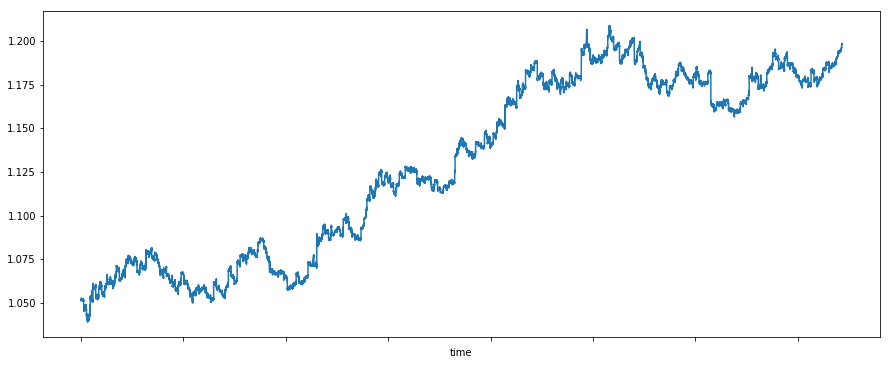

In [12]:
eurusd_m1_2017_df["close"].plot(figsize=(15,6))

In [14]:
# 資料筆數
len(eurusd_m1_2017_df)

185811

In [18]:
ta_df = eurusd_m1_2017_df[['close', 'vol', 'Ask', 'Bid', 'Stoch(K)', 'Stoch(D)', 'RSI', 'MACD(val)', 'MACD(sig)']]
ta_df[:100]

,close,vol,Ask,Bid,Stoch(K),Stoch(D),RSI,MACD(val),MACD(sig)
time,,,,,,,,,
2017.01.02 00:00,1.05129,41.0,1.05128,1.05100,5.77778,10.60403,32.74961,0.0,0.0
2017.01.02 00:01,1.05100,1.0,1.05144,1.05116,9.75610,10.18006,25.76807,0.0,0.0
2017.01.02 00:02,1.05116,1.0,1.05144,1.05116,11.98502,11.08254,34.11349,0.0,0.0
2017.01.02 00:03,1.05141,3.0,1.05169,1.05141,38.88889,27.32654,44.59475,0.0,0.0
2017.01.02 00:04,1.05141,1.0,1.05169,1.05141,51.89873,39.61264,44.59475,0.0,0.0
2017.01.02 00:05,1.05141,1.0,1.05186,1.05158,63.92694,51.76979,44.59475,0.0,0.0
2017.01.02 00:06,1.05158,10.0,1.05176,1.05148,72.41379,62.09179,51.18943,0.0,0.0
2017.01.02 00:07,1.05158,7.0,1.05186,1.05158,93.04813,78.80149,51.18943,0.0,0.0
2017.01.02 00:08,1.05148,13.0,1.05176,1.05148,88.50575,82.31672,47.34496,0.0,0.0
